# Localization

Predict a single bounding box per image. Uses the MobileNet-based classifier as the starting point.

**NOTE:** The results in this notebook are similar to those shown in the book but are not 100% the same. Because neural networks are initialized with random numbers, each training session will give slightly different results.

## Load the annotations

In [1]:
import os, sys
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image as tf_image
from tensorflow.keras import regularizers

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_dir = "snacks"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

In [3]:
train_annotations = pd.read_csv(os.path.join(data_dir, "annotations-train.csv"))
train_annotations.head()

,image_id,x_min,x_max,y_min,y_max,class_name,folder
0,009218ad38ab2010,0.192620,0.729831,0.127606,0.662219,cake,cake
1,009218ad38ab2010,0.802377,1.000000,0.102585,0.405338,ice cream,cake
2,009218ad38ab2010,0.814884,0.970607,0.121768,0.357798,ice cream,cake
3,00c7515143b32051,0.135084,0.904315,0.081735,0.909091,cake,muffin
4,00c7515143b32051,0.155722,0.910569,0.083403,0.893244,muffin,muffin


In [4]:
len(train_annotations)

7040

In [5]:
val_annotations = pd.read_csv(os.path.join(data_dir, "annotations-val.csv"))
test_annotations = pd.read_csv(os.path.join(data_dir, "annotations-test.csv"))

In [6]:
len(val_annotations), len(test_annotations)

(1417, 1380)

## Plot training image + its bounding boxes

In [7]:
image_width = 224
image_height = 224

In [8]:
from helpers_2 import plot_image

In [9]:
from keras.preprocessing import image

def plot_image_from_row(row, image_dir):
    image_path = os.path.join(image_dir, row["folder"], row["image_id"] + ".jpg")
    img = tf_image.load_img(image_path, target_size=(image_width, image_height))
    bbox = (row["x_min"], row["x_max"], row["y_min"], row["y_max"], row["class_name"])
    plot_image(img, [bbox])

In [10]:
import tensorflow as tf
print(tf.__version__)

2.18.0


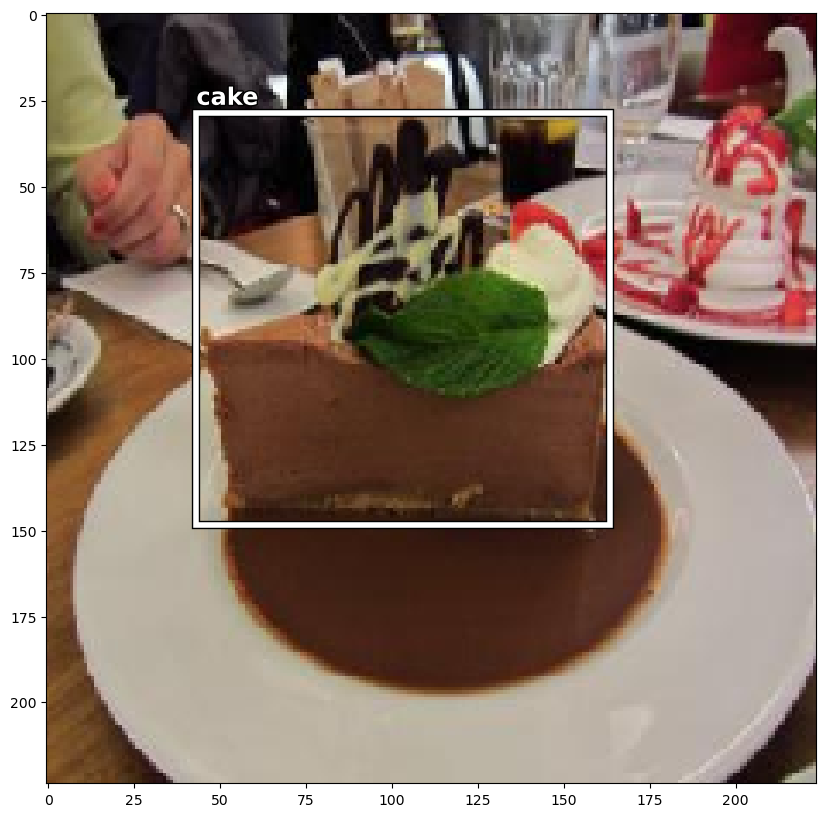

In [11]:
plot_image_from_row(train_annotations.iloc[0], train_dir)

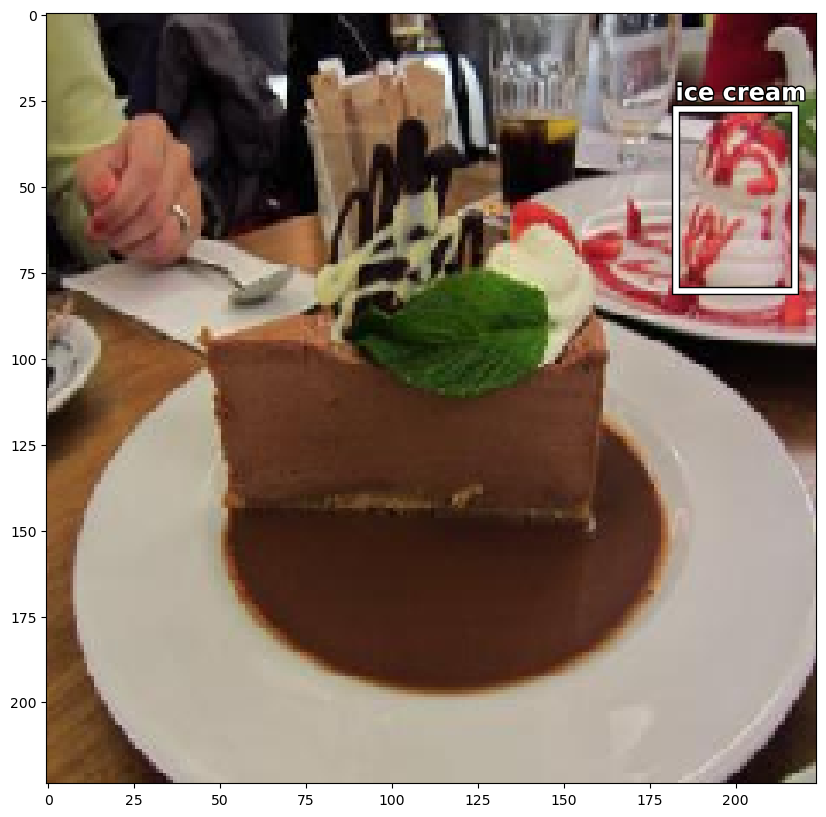

In [12]:
plot_image_from_row(train_annotations.iloc[2], train_dir)

## Custom generator

In [13]:
from helpers_2 import BoundingBoxGenerator

In [14]:
batch_size = 32
train_generator = BoundingBoxGenerator(train_annotations, train_dir, 
                                       image_height, image_width, 
                                       batch_size, shuffle=True)

In [15]:
train_iter = iter(train_generator)
X, (y_class, y_bbox) = next(train_iter)

In [16]:
X.shape, y_class.shape, y_bbox.shape

((32, 224, 224, 3), (32,), (32, 4))

In [17]:
y_bbox

array([[8.76830e-02, 1.00000e+00, 4.85130e-02, 8.16901e-01],
       [1.60100e-01, 5.25328e-01, 3.71831e-01, 8.52582e-01],
       [6.35795e-01, 8.64831e-01, 6.54412e-01, 9.36765e-01],
       [1.83178e-01, 6.04673e-01, 1.26329e-01, 8.14884e-01],
       [1.43215e-01, 9.82489e-01, 1.50709e-01, 9.21099e-01],
       [0.00000e+00, 7.45466e-01, 4.96714e-01, 1.00000e+00],
       [3.41118e-01, 5.07089e-01, 4.94059e-01, 6.87930e-01],
       [4.80960e-02, 5.99198e-01, 1.44385e-01, 7.72727e-01],
       [7.52345e-01, 8.55535e-01, 5.19249e-01, 6.65728e-01],
       [3.12700e-02, 2.12008e-01, 6.05634e-01, 8.72300e-01],
       [1.81181e-01, 8.64865e-01, 2.97297e-01, 8.72873e-01],
       [8.02377e-01, 9.26204e-01, 4.11176e-01, 5.52127e-01],
       [5.20458e-01, 9.93453e-01, 2.22586e-01, 9.41080e-01],
       [4.41900e-02, 4.04255e-01, 4.36989e-01, 9.73813e-01],
       [1.25078e-01, 3.42089e-01, 2.36620e-01, 4.95775e-01],
       [0.00000e+00, 3.36460e-01, 0.00000e+00, 9.24937e-01],
       [5.50344e-01, 9.6

In [18]:
y_class

array([ 9,  0,  0, 13, 18, 19, 17, 19,  0, 12,  2,  6, 16,  1,  8, 13, 14,
       18, 13, 12,  3,  7, 12, 17,  2, 18,  1,  7, 19, 19, 17, 18])

In [19]:
from helpers_2 import labels
list(map(lambda x: labels[x], y_class))

['ice cream',
 'apple',
 'apple',
 'pineapple',
 'waffle',
 'watermelon',
 'strawberry',
 'watermelon',
 'apple',
 'orange',
 'cake',
 'doughnut',
 'salad',
 'banana',
 'hot dog',
 'pineapple',
 'popcorn',
 'waffle',
 'pineapple',
 'orange',
 'candy',
 'grape',
 'orange',
 'strawberry',
 'cake',
 'waffle',
 'banana',
 'grape',
 'watermelon',
 'watermelon',
 'strawberry',
 'waffle']

In [20]:
len(train_generator)

220

In [21]:
def plot_image_from_batch(X, y_class, y_bbox, img_idx):
    class_name = labels[y_class[img_idx]]
    bbox = y_bbox[img_idx]
    plot_image(X[img_idx], [[*bbox, class_name]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9764705896377563].


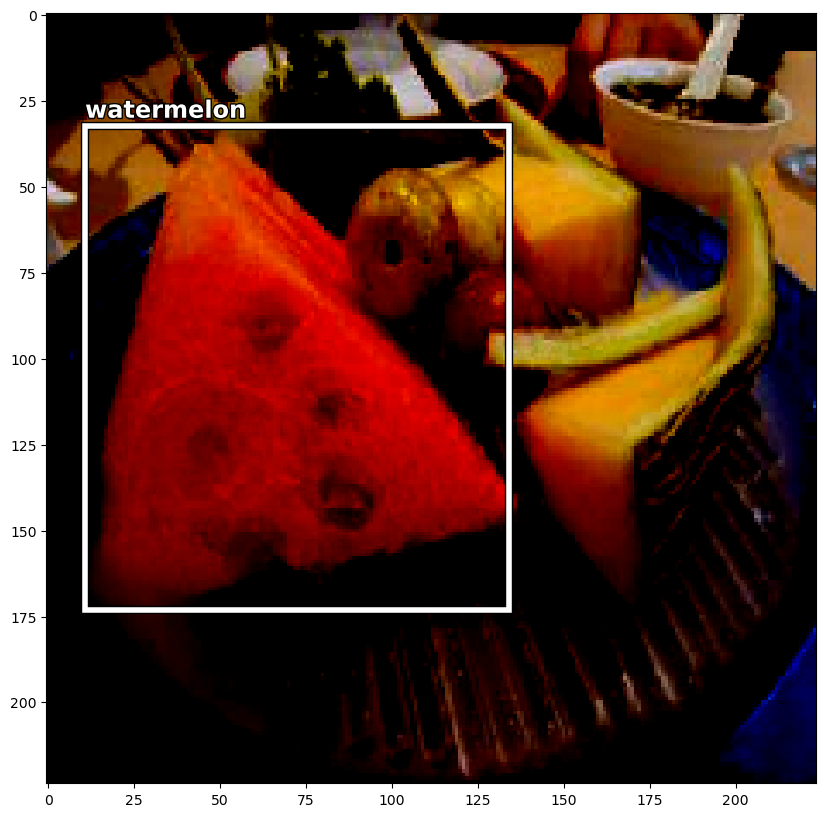

In [22]:
plot_image_from_batch(X, y_class, y_bbox, 7)

In [23]:
X, (y_class, y_bbox) = next(train_iter)

## Load the best model from last time

In [24]:
import keras
from keras.models import Sequential
from keras.layers import *
from keras.models import Model, load_model
from keras import optimizers, callbacks
import keras.backend as K

classifier_model = load_model("checkpoints/multisnacks-0.7162-0.8419.hdf5")

/Users/marcinsztukowski/miniconda3/envs/kerasenv_new/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


ValueError: Argument(s) not recognized: {'lr': 1.1111111234640703e-05}

In [ ]:
classifier_model.summary()

## Add the bounding box predictor to the model

In [30]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, GlobalAveragePooling2D, Conv2D, BatchNormalization
from tensorflow.keras import regularizers

num_classes = 20

# 1. Załaduj MobileNet jako feature extractor
classifier_model = MobileNet(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# 2. Warstwa bazowa (ostatnie wyjście z MobileNet)
base_output = classifier_model.output

# 3. Warstwa klasyfikacyjna
pool = GlobalAveragePooling2D()(base_output)
clf = Dropout(0.7)(pool)
clf = Dense(num_classes, kernel_regularizer=regularizers.l2(0.01), name="dense_class")(clf)
clf = Activation("softmax", name="class_prediction")(clf)

# 4. Warstwa regresji bbox
bbox = Conv2D(512, 3, padding="same")(base_output)
bbox = BatchNormalization()(bbox)
bbox = Activation("relu")(bbox)
bbox = GlobalAveragePooling2D()(bbox)
bbox = Dense(4, name="bbox_prediction")(bbox)

# 5. Model końcowy
model = Model(inputs=classifier_model.input, outputs=[clf, bbox])


In [32]:
for layer in classifier_model.layers:
    layer.trainable = False


In [33]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1           │ (None, 112, 112,  │        288 │ conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_bn        │ (None, 112, 112,  │        128 │ conv_dw_1[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_relu      │ (None, 112, 112,  │          0 │ conv_dw_1_bn[0][… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1 (Conv2D)  │ (None, 112, 112,  │      2,048 │ conv_dw_1_relu[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_bn        │ (None, 112, 112,  │        256 │ conv_pw_1[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_relu      │ (None, 112, 112,  │          0 │ conv_pw_1_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pad_2          │ (None, 113, 113,  │          0 │ conv_pw_1_relu[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2           │ (None, 56, 56,    │        576 │ conv_pad_2[0][0]  │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_bn        │ (None, 56, 56,    │        256 │ conv_dw_2[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_relu      │ (None, 56, 56,    │          0 │ conv_dw_2_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2 (Conv2D)  │ (None, 56, 56,    │      8,192 │ conv_dw_2_relu[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_bn        │ (None, 56, 56,    │        512 │ conv_pw_2[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_relu      │ (None, 56, 56,    │          0 │ conv_pw_2_bn[0][

 Total params: 7,972,568 (30.41 MB)

 Trainable params: 4,742,680 (18.09 MB)

 Non-trainable params: 3,229,888 (12.32 MB)

                                                                                                  
 conv_dw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_dw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
          

 conv_pw_10_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_pw_10_bn[0][0]']          
                                                                                                  
 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
          

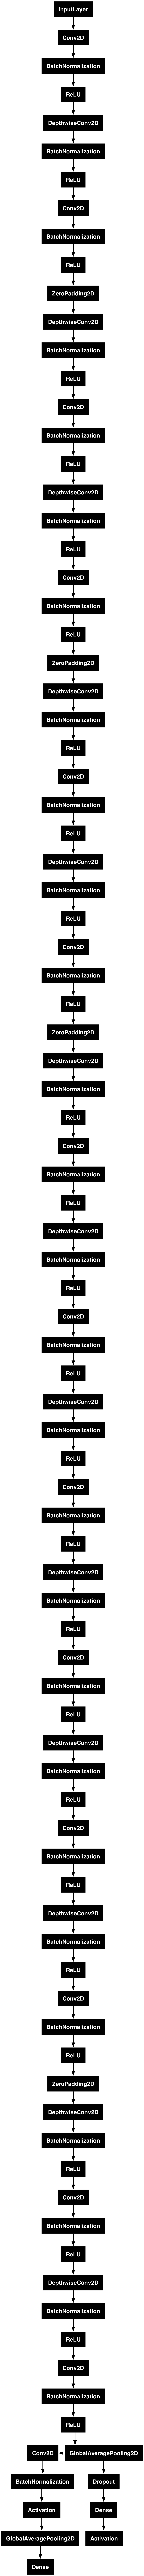

In [34]:
from keras.utils import plot_model
plot_model(model, to_file="bbox_model.png")

Put the old weights back, or the classifier won't work anymore:

In [37]:
layer_dict = {layer.name:i for i, layer in enumerate(model.layers)}

# Get the weights from the checkpoint model.
weights = classifier_model.layers[-2].get_weights()


# Put them into the new model.
model.layers[layer_dict["dense_class"]].set_weights(weights)


ValueError: You called `set_weights(weights)` on layer 'dense_class' with a weight list of length 4, but the layer was expecting 2 weights.

In [36]:
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[1.0, 10.0],
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics={ "class_prediction": "accuracy" })

## Try the model on an image

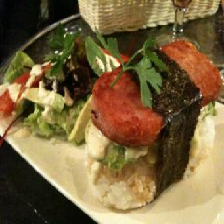

In [32]:
#from keras.applications.mobilenet import preprocess_input
#from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img(train_dir + "/salad/2ad03070c5900aac.jpg", target_size=(image_width, image_height))
img

In [33]:
#from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input




x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [34]:
preds = model.predict(x)
preds

2025-06-14 14:09:48.063755: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 209ms/step


[array([[6.2198073e-05, 6.9950119e-07, 8.1047117e-05, 5.1483898e-06,
         3.2753899e-04, 2.7183614e-06, 5.1046723e-06, 4.7677665e-04,
         6.0638448e-04, 5.7834911e-04, 4.4039472e-05, 6.4485666e-06,
         1.7311391e-05, 2.4160274e-04, 1.8937591e-06, 7.4872378e-07,
         9.6561831e-01, 2.4065843e-03, 1.6231955e-03, 2.7893867e-02]],
       dtype=float32),
 array([[-1.4475477 , -0.72610563, -0.33027983, -0.29864767]],
       dtype=float32)]

In [35]:
len(preds)

2

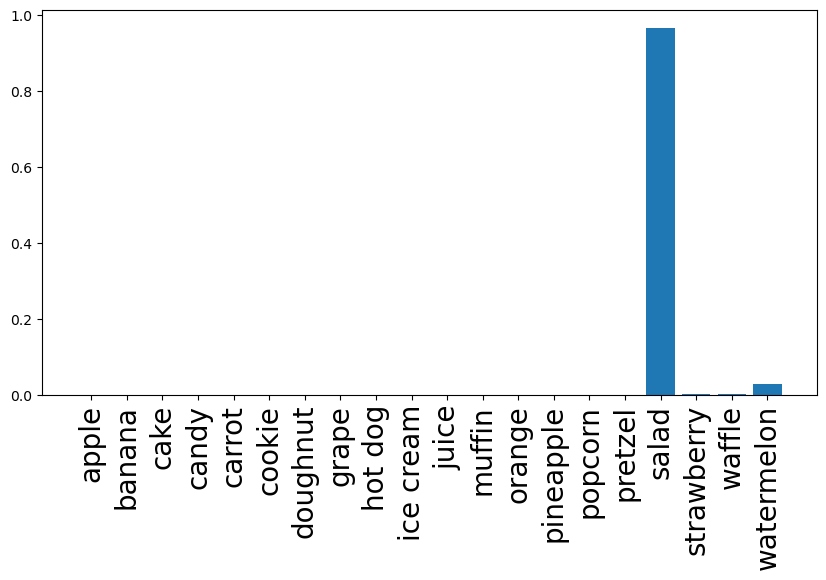

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(range(num_classes), preds[0].squeeze())
plt.xticks(range(num_classes), labels, rotation=90, fontsize=20)
plt.show()

In [37]:
preds = classifier_model.predict(x)
preds

1/1 [==============================] - 0s 144ms/step


array([[6.2198073e-05, 6.9950119e-07, 8.1047117e-05, 5.1483898e-06,
        3.2753899e-04, 2.7183614e-06, 5.1046723e-06, 4.7677665e-04,
        6.0638448e-04, 5.7834911e-04, 4.4039472e-05, 6.4485666e-06,
        1.7311391e-05, 2.4160274e-04, 1.8937591e-06, 7.4872378e-07,
        9.6561831e-01, 2.4065843e-03, 1.6231955e-03, 2.7893867e-02]],
      dtype=float32)

In [38]:
preds = model.predict(train_generator)

220/220 [==============================] - 56s 256ms/step


In [39]:
preds[1].shape

(7040, 4)

## Train the model

In [40]:
val_generator = BoundingBoxGenerator(val_annotations, val_dir, 
                                     image_height, image_width, 
                                     batch_size, shuffle=False)

In [41]:
from helpers_2 import combine_histories, plot_loss, plot_bbox_loss

In [42]:
histories = []

In [ ]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=5,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

Epoch 1/5
 15/220 [=>............................] - ETA: 1:06 - loss: 16.3076 - class_prediction_loss: 0.5582 - bbox_prediction_loss: 1.5603 - class_prediction_accuracy: 0.8896

In [ ]:
history = combine_histories(histories)
plot_loss(history)

In [ ]:
plot_bbox_loss(history)

## Adding the IOU metric

In [ ]:
from helpers_2 import iou, MeanIOU, plot_iou

bbox1 = [0.2, 0.7, 0.3, 0.6, "bbox1"]
bbox2 = [0.4, 0.6, 0.2, 0.5, "bbox2"]
iou(bbox1, bbox2)

In [ ]:
plot_image(img, [bbox1, bbox2])

In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import Metric

class MeanIoUMetric(Metric):
    def __init__(self, name="mean_iou", **kwargs):
        super(MeanIoUMetric, self).__init__(name=name, **kwargs)
        self.total_iou = self.add_weight(name="total_iou", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Coordinates: [x_min, x_max, y_min, y_max]
        xA = tf.maximum(y_true[:, 0], y_pred[:, 0])
        yA = tf.maximum(y_true[:, 2], y_pred[:, 2])
        xB = tf.minimum(y_true[:, 1], y_pred[:, 1])
        yB = tf.minimum(y_true[:, 3], y_pred[:, 3])

        inter_area = tf.maximum(0.0, xB - xA) * tf.maximum(0.0, yB - yA)

        box_true_area = (y_true[:, 1] - y_true[:, 0]) * (y_true[:, 3] - y_true[:, 2])
        box_pred_area = (y_pred[:, 1] - y_pred[:, 0]) * (y_pred[:, 3] - y_pred[:, 2])
        union_area = box_true_area + box_pred_area - inter_area

        iou = tf.math.divide_no_nan(inter_area, union_area)

        self.total_iou.assign_add(tf.reduce_sum(iou))
        self.count.assign_add(tf.cast(tf.size(iou), tf.float32))

    def result(self):
        return tf.math.divide_no_nan(self.total_iou, self.count)

    def reset_state(self):
        self.total_iou.assign(0.0)
        self.count.assign(0.0)

**NOTE:** At this point I went back to the beginning of the notebook and created the model again. That way you can see clearer how the mean IOU increases over time. Just run all the cells from the section **Add the bounding box predictor to the model** again, then come back here. 

In [ ]:
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[1.0, 10.0],
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics={ "class_prediction": "accuracy", 
                        "bbox_prediction": MeanIoUMetric() })

In [ ]:
histories = []

In [ ]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=5,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

In [ ]:
K.set_value(model.optimizer.lr, K.get_value(model.optimizer.lr) / 10)

In [ ]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=5,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

In [ ]:
K.set_value(model.optimizer.lr, K.get_value(model.optimizer.lr) / 10)

In [ ]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=5,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

In [ ]:
history = combine_histories(histories)
plot_loss(history)

In [ ]:
plot_bbox_loss(history)

In [ ]:
plot_iou(history)

## Try the model on the test set

In [ ]:
def plot_prediction(row, image_dir):
    image_path = os.path.join(image_dir, row["folder"], row["image_id"] + ".jpg")
    img = load_img(image_path, target_size=(image_width, image_height))
    bbox_true = [row["x_min"], row["x_max"], row["y_min"], row["y_max"], row["class_name"].upper()]
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    bbox_pred = [*pred[1][0], labels[np.argmax(pred[0])]]
    
    plot_image(img, [bbox_true, bbox_pred])
   
    print("IOU:", iou(bbox_true, bbox_pred))

In [ ]:
row_index = np.random.randint(len(test_annotations))
row = test_annotations.iloc[row_index]
plot_prediction(row, test_dir)